<a href="https://colab.research.google.com/github/rahulraopune/ACA-Benchmarking-Script/blob/master/LinearRegressionGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [156]:
dataset = pd.read_csv("ex1data.txt",header=None)
dataset.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [157]:
dataset.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [0]:
def normalize_features(X):
    mean = np.mean(X, axis = 0)
    std_dev = np.std(X, axis = 0)
    X_Norm = (X - mean) / std_dev
    return X_Norm

In [0]:
def compute_error(X,Y,w):
    h_x = X.dot(w)
    squareError = (Y - h_x) ** 2
    return (1/(2*len(Y))) * np.sum(squareError)

In [160]:
data=dataset.values
m = data[:,0].size
ones = np.ones(m).reshape(-1,1)
X = np.append(ones,data[:,0].reshape(-1,1),axis = 1)
Y = data[:,1].reshape(-1,1)
w = np.zeros((2,1))
print(compute_error(X,Y,w))

32.072733877455676


In [161]:
compute_error(X,Y,w)

32.072733877455676

In [0]:
def gradient_descent(X,Y,w,learning_rate,iterations):

    m=len(Y)
    error_cost_iteration = []

    for iter in range(iterations):
        h_x = np.dot(X,w)
        error = np.matmul(X.transpose(),(h_x - Y)) 
        gradient_descent = learning_rate / m * error
        w = w - gradient_descent
        error_cost_iteration.append(compute_error(X,Y,w))

    return w,error_cost_iteration

In [163]:
w,error_cost_iteration = gradient_descent(X,Y,w,0.01,15000)
print(w)

[[-3.89578088]
 [ 1.19303364]]


Text(0, 0.5, 'w')

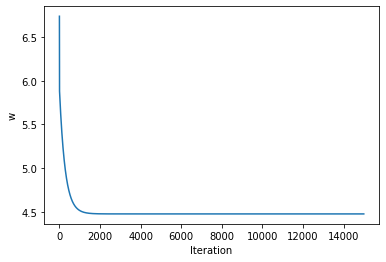

In [164]:
plt.plot(error_cost_iteration)
plt.xlabel("Iteration")
plt.ylabel("w")